In [1]:
import requests
import json
import os
import seaborn as sns
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from typing import List, Union

PROCON_TOKEN = os.environ.get('PROCON_TOKEN')

# 1. Get problem

In [2]:
url = "https://proconvn.duckdns.org"
headers = {"Authorization": PROCON_TOKEN}

In [22]:
question_id = 66
question = requests.get(f"{url}/question/{question_id}", headers=headers).json()

In [34]:
question,question.get('question_data')

({'id': 66,
  'name': 'Q1',
  'question_data': '{"board":{"width":32,"height":32,"start":[[2,0,3,0,2,0,2,3,1,1,2,1,0,2,3,0,3,1,0,2,2,1,1,2,1,0,3,2,1,3,0,3],[1,1,0,0,3,0,0,2,1,0,0,1,1,3,0,2,1,3,3,0,1,2,2,0,0,1,3,1,2,2,0,3],[3,1,2,3,1,3,0,0,0,0,1,2,2,1,2,1,0,3,2,2,3,3,0,0,2,2,3,2,1,0,0,2],[1,1,3,1,1,2,1,2,2,1,2,3,1,3,0,1,0,2,1,2,0,1,2,0,1,3,3,3,1,1,3,0],[0,0,3,1,2,0,0,3,1,2,3,1,2,1,2,3,3,1,2,3,3,1,0,2,3,3,2,2,2,0,2,1],[2,3,2,0,1,1,2,3,2,2,1,2,0,2,1,0,2,3,3,2,3,2,3,3,1,3,2,0,1,2,1,2],[0,3,2,0,3,2,3,1,0,1,3,3,2,2,1,3,1,0,2,2,3,3,1,2,0,1,2,1,1,1,1,1],[2,3,1,3,0,3,2,3,3,2,3,1,0,2,1,3,1,0,0,1,2,3,2,2,2,2,3,2,2,1,1,3],[2,0,0,0,0,0,0,3,3,3,1,0,3,0,0,1,2,2,1,0,0,1,2,1,3,0,1,1,3,0,0,0],[0,0,3,3,2,3,2,3,1,1,2,1,2,2,3,0,0,3,2,2,2,1,1,3,0,0,2,0,1,1,1,1],[1,3,1,3,2,0,2,1,3,0,2,1,0,3,1,0,2,2,0,3,1,2,1,2,0,3,1,1,1,3,3,3],[3,2,3,2,0,2,3,2,1,3,2,2,0,0,1,0,3,0,2,1,1,3,0,3,2,0,1,1,1,3,0,3],[2,2,3,2,1,1,0,1,1,1,2,2,3,1,0,1,1,1,0,2,0,0,0,3,2,2,1,1,3,3,3,0],[2,3,1,1,2,0,1,2,0,3,1,1,0,0,1,1,3,1,0,3,2,3,2,1,2,0

In [4]:
def getProblem(question_id:int):
    response = requests.get(f"{url}/question/{question_id}", headers=headers).json()
    try:
        question_data = eval(response.get('question_data'))
        height = question_data.get('board').get('height')
        width = question_data.get('board').get('width')
        start = question_data.get('board').get('start')
        goal = question_data.get('board').get('goal')
        n_generated = question_data.get('general', {}).get('n',None)
        general_die = question_data.get('general', {}).get('patterns',[])
        print(f"Height: {height}, Width: {width}, n_generated: {n_generated}")
        return height, width, start, goal, n_generated, general_die
    except Exception as e:
        print("Wrong question id")
        return None, None, None, None, None, None
    

In [16]:
def plot_matrix_comparison(matrix1:Union[ndarray, list], matrix2:[ndarray, list], h:int, w:int):
  """Compares two matrices and returns a heatmap with green for equal values and red for unequal values.

  Args:
    matrix1: The first matrix.
    matrix2: The second matrix.

  Returns:
    A heatmap showing the comparison results.
  """

  # Check if the matrices have the same dimensions
  if isinstance(matrix1, list):
    matrix1 = np.array(matrix1)
  if isinstance(matrix2, list):
    matrix2 = np.array(matrix2)
  if matrix1.shape != matrix2.shape:
    raise ValueError("Matrices must have the same dimensions.")

  comparison_matrix = (matrix1 == matrix2).astype(int)

  # Create a heatmap using seaborn with green for equal values and red for unequal values
  sns.set(rc={'figure.figsize': (w, h)})
  sns.heatmap(comparison_matrix, cmap="RdYlGn", fmt="d", cbar=False)
  plt.show()

In [28]:
question_id = 77
height, width, start, goal, n_generated, general_die = getProblem(question_id)

Height: 32, Width: 32, n_generated: 2


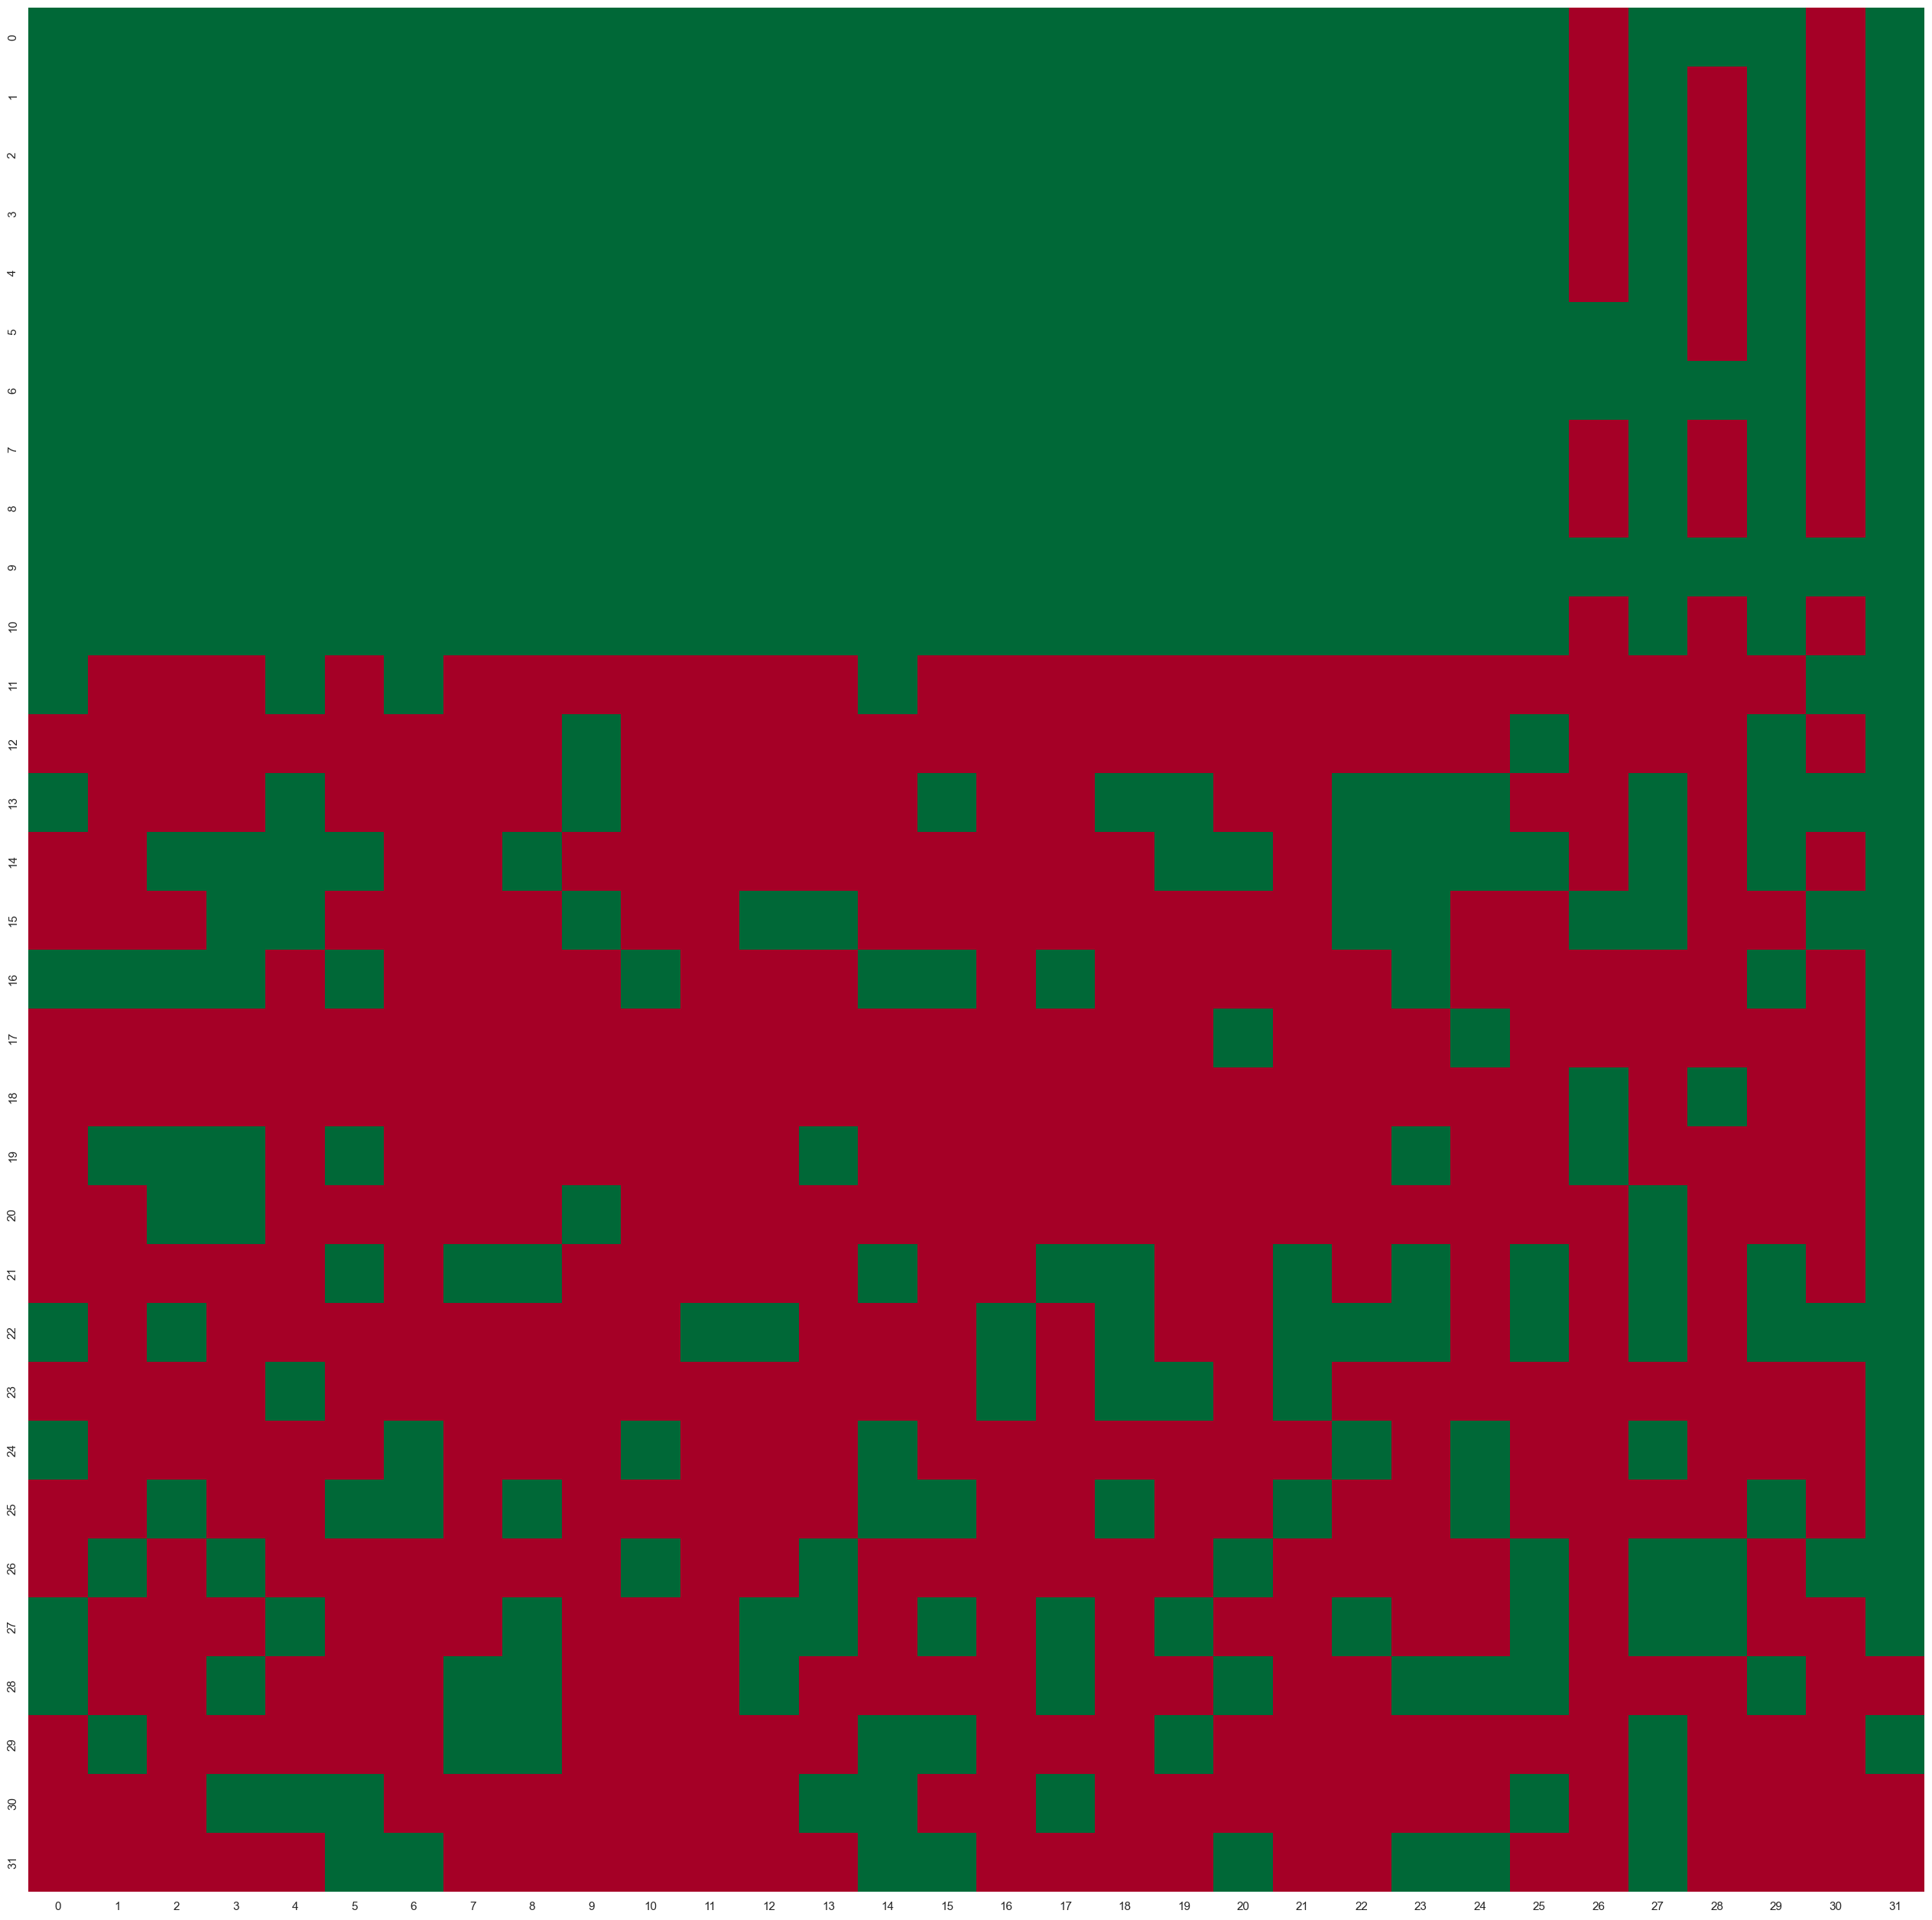

In [21]:
plot_matrix_comparison(goal,start,height,width)

# 2. Submit

In [24]:
solve = {
    "n": 3,
    "ops": [
        {
            "p": 4,
            "x": 5,
            "y": 6,
            "s": 2
        },
        {
            "p": 11,
            "x": 3,
            "y": -12,
            "s": 3
        },
        {
            "p": 25,
            "x": 6,
            "y": 0,
            "s": 0
        }
    ]}

In [25]:
payload = {"question_id": question_id, "answer_data": solve}
res = requests.post(f"{url}/answer", json=payload, headers=headers).json()

In [26]:
res

{'id': 313}

# 3. Get Score

In [32]:
answer = requests.get(f"{url}/answer/{313}", headers=headers).json()
score_data = json.loads(answer["score_data"])
print("final score:", score_data["final_score"])

final score: 231.1


In [33]:
answer

{'id': 313,
 'answer_data': '{"n":3,"ops":[{"p":4,"x":5,"y":6,"s":2},{"p":11,"x":3,"y":-12,"s":3},{"p":25,"x":6,"y":0,"s":0}]}',
 'score_data': '{"step_penalty":-0.9,"max_match_count":1024,"step_count":3,"match_factor":1,"step_factor":-0.3,"resubmission_factor":-1,"resubmission_count":1,"resubmission_penalty":-1,"status":"done","final_score":231.1,"match_score":233,"match_count":233}',
 'submitted_time': '2024-09-25T14:33:32.000Z',
 'createdAt': '2024-09-25T09:41:22.000Z',
 'updatedAt': '2024-09-25T14:33:32.000Z',
 'match_id': 1,
 'team_id': 24,
 'question_id': 66,
 'question': {'id': 66, 'name': 'Q1', 'match_id': 1},
 'team': {'id': 24, 'name': 'DumplingCode'},
 'match': {'id': 1,
  'name': 'Match 1',
  'description': '',
  'start_time': '2024-09-02T17:00:00.000Z',
  'end_time': '2024-11-29T17:00:00.000Z',
  'is_active': True,
  'createdAt': '2024-08-18T20:51:47.000Z',
  'updatedAt': '2024-09-15T13:26:45.000Z',
  'round_id': 1}}